In [1]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Embedding, Dense, Bidirectional
import numpy as np 

In [2]:
tokenizer = Tokenizer()

In [3]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

In [4]:
corpus = data.lower().split('\n')

In [5]:
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [7]:
tokenizer.fit_on_texts(corpus)

In [8]:
total_words = len(tokenizer.word_index) + 1

In [9]:
print(total_words)

263


In [10]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [11]:
input_sequences = []

In [12]:
for line in corpus:
    print(line)

in the town of athy one jeremy lanigan 
 battered away til he hadnt a pound. 
his father died and made him a man again 
 left him a farm and ten acres of ground. 
he gave a grand party for friends and relations 
who didnt forget him when come to the wall, 
and if youll but listen ill make your eyes glisten 
of the rows and the ructions of lanigans ball. 
myself to be sure got free invitation, 
for all the nice girls and boys i might ask, 
and just in a minute both friends and relations 
were dancing round merry as bees round a cask. 
judy odaly, that nice little milliner, 
she tipped me a wink for to give her a call, 
and i soon arrived with peggy mcgilligan 
just in time for lanigans ball. 
there were lashings of punch and wine for the ladies, 
potatoes and cakes; there was bacon and tea, 
there were the nolans, dolans, ogradys 
courting the girls and dancing away. 
songs they went round as plenty as water, 
the harp that once sounded in taras old hall,
sweet nelly gray and the rat ca

In [13]:
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    print(token_list)

[4, 2, 66, 8, 67, 68, 69, 70]
[71, 40, 20, 21, 72, 3, 73]
[16, 74, 75, 1, 76, 33, 3, 77, 22]
[41, 33, 3, 78, 1, 79, 80, 8, 81]
[21, 82, 3, 83, 84, 7, 42, 1, 43]
[85, 86, 87, 33, 44, 88, 13, 2, 45]
[1, 89, 90, 91, 92, 93, 94, 95, 96, 97]
[8, 2, 98, 1, 2, 99, 8, 9, 10]
[46, 13, 100, 101, 23, 102, 103]
[7, 5, 2, 47, 17, 1, 24, 6, 104, 105]
[1, 48, 4, 3, 106, 107, 42, 1, 43]
[11, 49, 25, 50, 18, 108, 25, 3, 109]
[110, 111, 26, 47, 112, 113]
[14, 51, 52, 3, 114, 7, 13, 115, 27, 3, 116]
[1, 6, 53, 117, 118, 119, 120]
[48, 4, 54, 7, 9, 10]
[28, 11, 121, 8, 122, 1, 123, 7, 2, 124]
[125, 1, 126, 28, 34, 127, 1, 128]
[28, 11, 2, 129, 130, 131]
[132, 2, 17, 1, 49, 40]
[133, 19, 134, 25, 18, 135, 18, 136]
[2, 137, 26, 138, 139, 4, 140, 55, 141]
[142, 143, 144, 1, 2, 145, 146, 147]
[5, 148, 149, 12, 9, 10]
[19, 11, 150, 5, 151, 8, 152, 153]
[5, 25, 2, 154, 4, 3, 155]
[156, 1, 6, 157, 158, 56, 159]
[1, 51, 57, 2, 160, 8, 3, 161, 1, 3, 162]
[163, 164, 165, 2, 17, 23, 5, 166, 12, 52]
[58, 20, 167, 168

In [14]:
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        print(n_gram_sequence)

[4, 2]
[4, 2, 66]
[4, 2, 66, 8]
[4, 2, 66, 8, 67]
[4, 2, 66, 8, 67, 68]
[4, 2, 66, 8, 67, 68, 69]
[4, 2, 66, 8, 67, 68, 69, 70]
[71, 40]
[71, 40, 20]
[71, 40, 20, 21]
[71, 40, 20, 21, 72]
[71, 40, 20, 21, 72, 3]
[71, 40, 20, 21, 72, 3, 73]
[16, 74]
[16, 74, 75]
[16, 74, 75, 1]
[16, 74, 75, 1, 76]
[16, 74, 75, 1, 76, 33]
[16, 74, 75, 1, 76, 33, 3]
[16, 74, 75, 1, 76, 33, 3, 77]
[16, 74, 75, 1, 76, 33, 3, 77, 22]
[41, 33]
[41, 33, 3]
[41, 33, 3, 78]
[41, 33, 3, 78, 1]
[41, 33, 3, 78, 1, 79]
[41, 33, 3, 78, 1, 79, 80]
[41, 33, 3, 78, 1, 79, 80, 8]
[41, 33, 3, 78, 1, 79, 80, 8, 81]
[21, 82]
[21, 82, 3]
[21, 82, 3, 83]
[21, 82, 3, 83, 84]
[21, 82, 3, 83, 84, 7]
[21, 82, 3, 83, 84, 7, 42]
[21, 82, 3, 83, 84, 7, 42, 1]
[21, 82, 3, 83, 84, 7, 42, 1, 43]
[85, 86]
[85, 86, 87]
[85, 86, 87, 33]
[85, 86, 87, 33, 44]
[85, 86, 87, 33, 44, 88]
[85, 86, 87, 33, 44, 88, 13]
[85, 86, 87, 33, 44, 88, 13, 2]
[85, 86, 87, 33, 44, 88, 13, 2, 45]
[1, 89]
[1, 89, 90]
[1, 89, 90, 91]
[1, 89, 90, 91, 92]
[1, 89

In [15]:
print(input_sequences)

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21], [71, 40, 20, 21, 72], [71, 40, 20, 21, 72, 3], [71, 40, 20, 21, 72, 3, 73], [16, 74], [16, 74, 75], [16, 74, 75, 1], [16, 74, 75, 1, 76], [16, 74, 75, 1, 76, 33], [16, 74, 75, 1, 76, 33, 3], [16, 74, 75, 1, 76, 33, 3, 77], [16, 74, 75, 1, 76, 33, 3, 77, 22], [41, 33], [41, 33, 3], [41, 33, 3, 78], [41, 33, 3, 78, 1], [41, 33, 3, 78, 1, 79], [41, 33, 3, 78, 1, 79, 80], [41, 33, 3, 78, 1, 79, 80, 8], [41, 33, 3, 78, 1, 79, 80, 8, 81], [21, 82], [21, 82, 3], [21, 82, 3, 83], [21, 82, 3, 83, 84], [21, 82, 3, 83, 84, 7], [21, 82, 3, 83, 84, 7, 42], [21, 82, 3, 83, 84, 7, 42, 1], [21, 82, 3, 83, 84, 7, 42, 1, 43], [85, 86], [85, 86, 87], [85, 86, 87, 33], [85, 86, 87, 33, 44], [85, 86, 87, 33, 44, 88], [85, 86, 87, 33, 44, 88, 13], [85, 86, 87, 33, 44, 88, 13, 2], [85, 86, 87, 33, 44, 88, 13, 2, 45], [1, 89], [1, 89,

In [17]:
max_sequence_len = max([len(i) for i in input_sequences])

In [18]:
print(max_sequence_len)

11


In [19]:
input_padded = np.array(pad_sequences(input_sequences, maxlen= max_sequence_len, padding = 'pre'))

In [20]:
print(input_padded)

[[  0   0   0 ...   0   4   2]
 [  0   0   0 ...   4   2  66]
 [  0   0   0 ...   2  66   8]
 ...
 [  0   0   0 ...  60 262  13]
 [  0   0   0 ... 262  13   9]
 [  0   0   0 ...  13   9  10]]


In [21]:
xs, labels = input_padded[:,:-1], input_padded[:,-1]

In [22]:
print(xs)

[[  0   0   0 ...   0   0   4]
 [  0   0   0 ...   0   4   2]
 [  0   0   0 ...   4   2  66]
 ...
 [  0   0   0 ...  61  60 262]
 [  0   0   0 ...  60 262  13]
 [  0   0   0 ... 262  13   9]]


In [23]:
print(labels)

[  2  66   8  67  68  69  70  40  20  21  72   3  73  74  75   1  76  33
   3  77  22  33   3  78   1  79  80   8  81  82   3  83  84   7  42   1
  43  86  87  33  44  88  13   2  45  89  90  91  92  93  94  95  96  97
   2  98   1   2  99   8   9  10  13 100 101  23 102 103   5   2  47  17
   1  24   6 104 105  48   4   3 106 107  42   1  43  49  25  50  18 108
  25   3 109 111  26  47 112 113  51  52   3 114   7  13 115  27   3 116
   6  53 117 118 119 120   4  54   7   9  10  11 121   8 122   1 123   7
   2 124   1 126  28  34 127   1 128  11   2 129 130 131   2  17   1  49
  40  19 134  25  18 135  18 136 137  26 138 139   4 140  55 141 143 144
   1   2 145 146 147 148 149  12   9  10  11 150   5 151   8 152 153  25
   2 154   4   3 155   1   6 157 158  56 159  51  57   2 160   8   3 161
   1   3 162 164 165   2  17  23   5 166  12  52  20 167 168   2 169 170
 171   6  35  29  30  12 172 173  37  38   7   9  10  39  30   6  35  31
   4  59  39  30  13 174 175  12   5  39  30   6  3

In [24]:
ys = to_categorical(labels, num_classes= total_words)

In [25]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [26]:
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [27]:
print(ys[6])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
model = Sequential()


In [29]:
model.add(Embedding(total_words, 64, input_length= max_sequence_len - 1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(
    xs,
    ys,
    epochs=499,
    verbose=1
)

poch 302/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3344 - accuracy: 0.9448
Epoch 303/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3324 - accuracy: 0.9470
Epoch 304/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3283 - accuracy: 0.9448
Epoch 305/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3250 - accuracy: 0.9470
Epoch 306/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3217 - accuracy: 0.9470
Epoch 307/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3327 - accuracy: 0.9404
Epoch 308/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3225 - accuracy: 0.9426
Epoch 309/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3172 - accuracy: 0.9426
Epoch 310/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3127 - accuracy: 0.9492
Epoch 311/499
15/15 [==============================] - 0s 7ms/step - loss: 0.3083 - accuracy

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

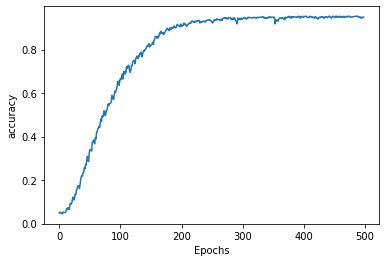

In [34]:
plot_graphs(history, 'accuracy')

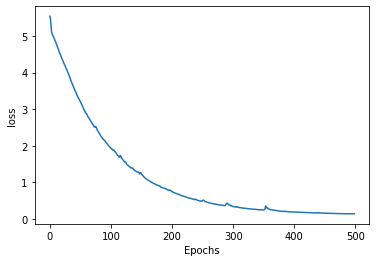

In [35]:
plot_graphs(history, 'loss')

In [36]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Laurence went to dublin merry merry the the free invitation suppose suppose ground dublin odaly suppose suppose then was mchugh then he suppose suppose suppose tea able able able able able youd hall hall suppose twas boys creature man again nelly hall call nelly call call call together together together together together together together at at lanigans ball ball ball ball nelly ball call nelly ball call nelly jig call call he call call call then up brothers creature fainted fainted jig i hoops hoops finnertys hoops no further colleen hall hall hall hall youd hall hall then up again nelly jig gray nelly
